Проведем небольшое исследование, основанное на материале данной статьи.<br>
<a href="https://nplus1.ru/news/2018/01/17/roasted">https://nplus1.ru/news/2018/01/17/roasted</a> <br>
В ней студенты провели исследование и выяснили, что картофель по-деревенски следует разрезать несколько иным способом, чтобы получить лучший вкус. Помимо этого картофель становится более приятным на вид и более хрустящим.<br>
У нас нет исходных данных по результатам опроса, но допустим, что они были распределены нормально со средним, указанным на графиках. Попробуем сгенерировать различные исходные данные, варьируя при этом дисперсию распределений.<br>

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [19]:
taste_cl=np.random.normal(7.2, 2.0, 100)
taste_new=np.random.normal(7.8, 2.0, 100)
crunch_cl=np.random.normal(6.4, 2.0, 100)
crunch_new=np.random.normal(8.5, 2.0, 100)
visual_cl=np.random.normal(7.8, 2.0, 100)
visual_new=np.random.normal(8.0, 2.0, 100)
averages_cl=np.array([np.average(taste_cl), np.average(crunch_cl), np.average(visual_cl)])
averages_cl=np.append(averages_cl, np.average(averages_cl))
averages_new=np.array([np.average(taste_new), np.average(crunch_new), np.average(visual_new)])
averages_new=np.append(averages_new, np.average(averages_new))


Построим теперь графики, показанные в статье, по сгенерированным данным (но плоские, а не трехмерные). Для этого используем столбчатую диаграмму (ax.bar) в которую передаются координаты по двум осям и другие известные нам параметры. Для того, чтобы графики не пересекались будем использовать смещение на ширину столбца. То есть получается, что между соседними показателями по оси X расстаяние равно 1, ширина каждого из столбцов 0.35, на расстояние между парами столбцов остается 0.3. <br>
Следующая особенность - использование тиков, то есть засечек (в нашем случае - по оси X). При помощи функции set_xticks передаем расположение засечек, а при помощи set_xticklabels задаем поддписи под засечками.

<IPython.core.display.Javascript object>


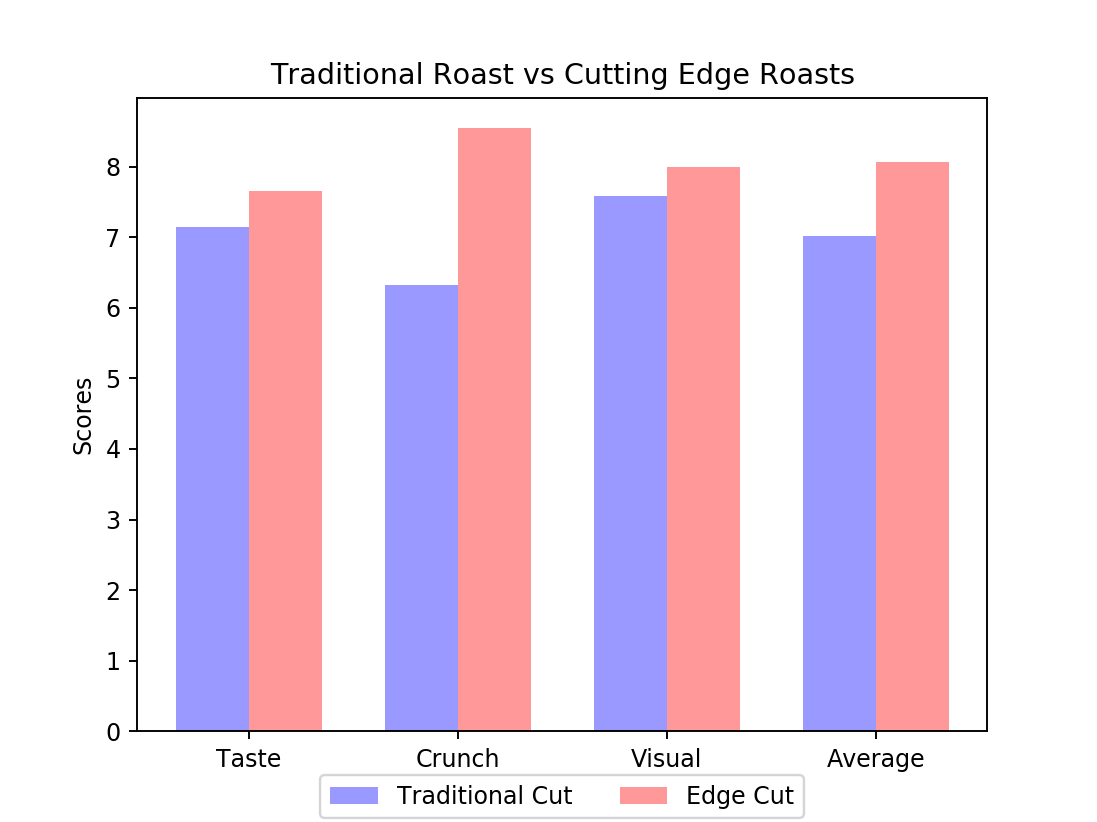

In [20]:
fig, ax = plt.subplots()
index = np.arange(4)
bar_width, opacity = 0.35, 0.4
rects1 = ax.bar(index, averages_cl, bar_width, alpha=opacity, color='b', label='Traditional Cut')
rects1 = ax.bar(index + bar_width, averages_new, bar_width, alpha=opacity, color='r', label='Edge Cut')
ax.set_ylabel('Scores')
ax.set_title('Traditional Roast vs Cutting Edge Roasts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Taste', 'Crunch', 'Visual', 'Average'))
ax.legend(loc = 'upper center', ncol=2, bbox_to_anchor=(0.5,-0.05))

plt.show()

Теперь убедимся, что по всем параметрам у нас имеется нормальное распределение. Для этого просто нарисуем гистограммы.<br>
Сразу становится видно несколько проеблем. Во-первых, никто не проверил, что сгенерированы данные из интервала [0, 10] (часть данных выходит за этот интервал). Во-вторых, на ум приходит идея, что заодно никто не гарантировал, что данные будут целыми. Наконец, в-третьих, становятся видны проблемы с симметричностью распределения.<br>
Возвращаясь к Matplotlib. Функция hist принимает набор данных, для которых необходимо посчитать гистограмму и количество интервалов в ней (остальные параметры нам уже знакомы). Она настолько любезна, что возвращает значения. раскиданные по интервалам, границы интервалов и список объектов со столбиками.<br>

<IPython.core.display.Javascript object>


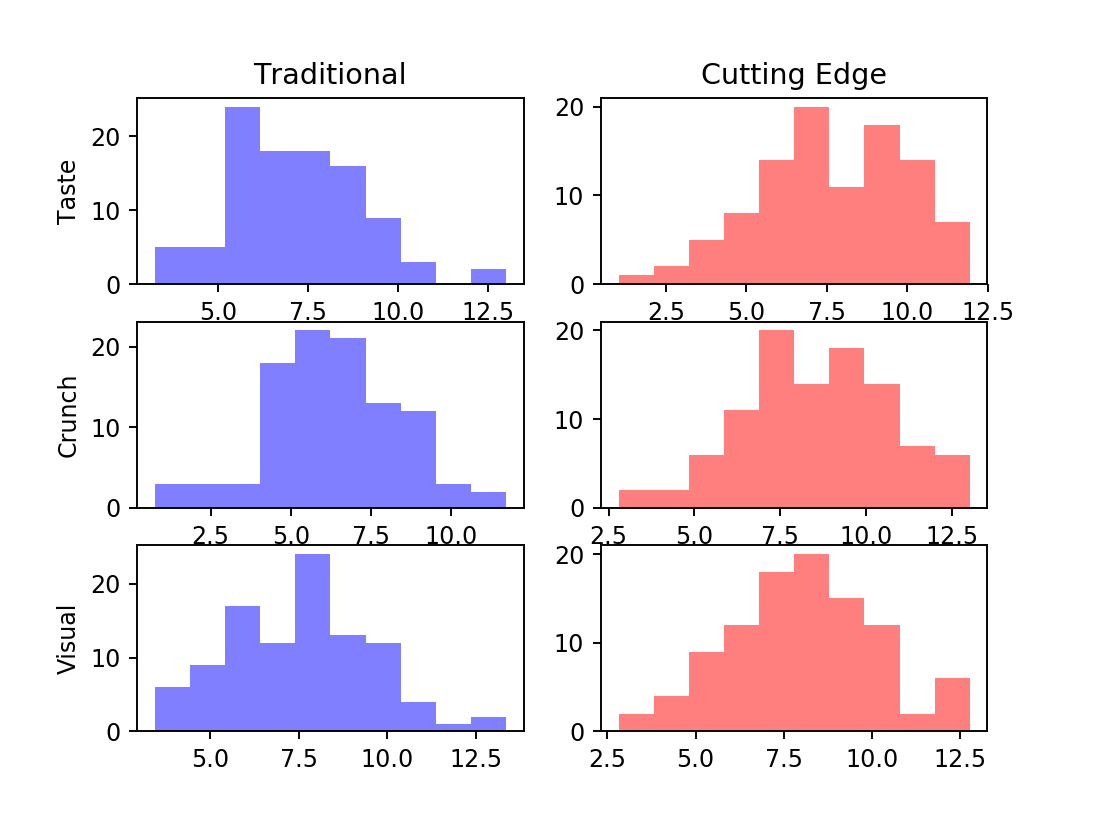

In [21]:
fig=plt.figure(1)
ax=fig.add_subplot(321)
plt.title('Traditional')
ax.set_ylabel('Taste')
n, bins, patches = plt.hist(taste_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(322)
plt.title('Cutting Edge')
n, bins, patches = plt.hist(taste_new, 10, facecolor='r', alpha=0.5)
ax=fig.add_subplot(323)
ax.set_ylabel('Crunch')
n, bins, patches = plt.hist(crunch_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(324)
n, bins, patches = plt.hist(crunch_new, 10, facecolor='r', alpha=0.5)
ax=fig.add_subplot(325)
ax.set_ylabel('Visual')
n, bins, patches = plt.hist(visual_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(326)
n, bins, patches = plt.hist(visual_new, 10, facecolor='r', alpha=0.5)

plt.show()

#print(patches[0], patches[1])

Для построения двумерной гистограммы можно использовать функцию <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist2d.html">hist2d</a>, в которую передается два массива данных (с X и Y координатами).<br>

<IPython.core.display.Javascript object>


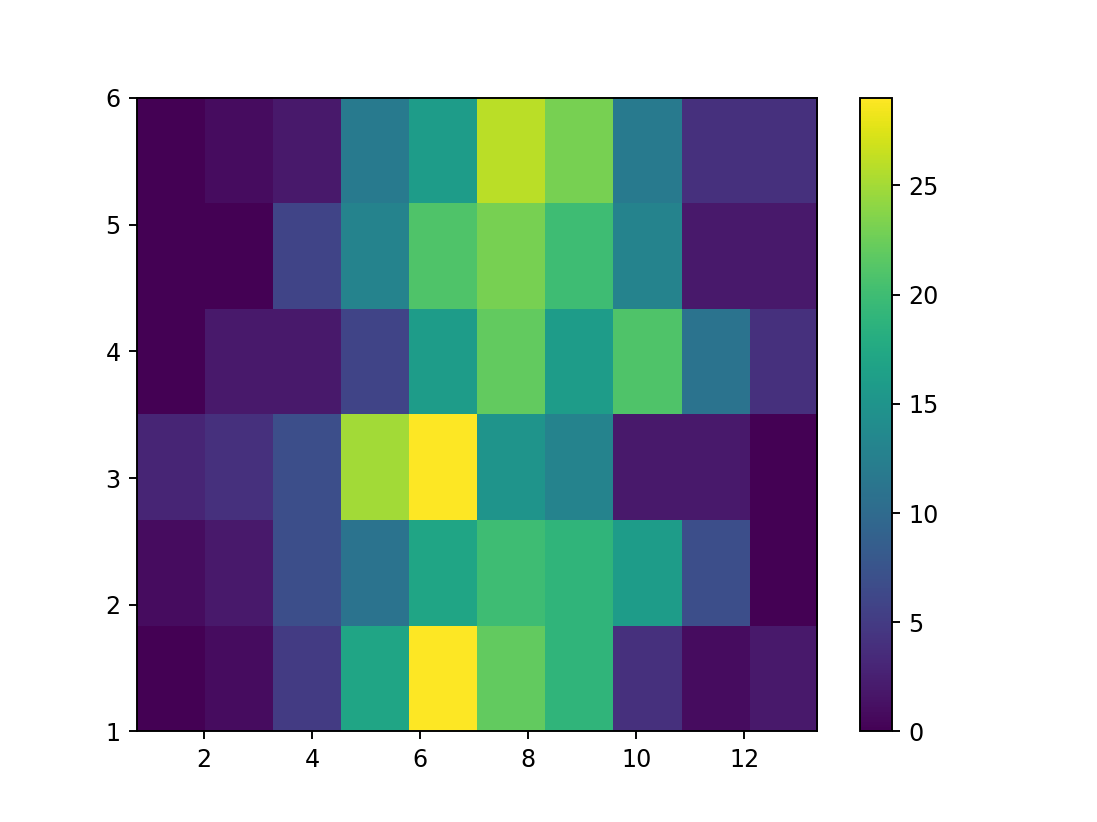

In [22]:
alldata=np.concatenate((taste_cl, taste_new, crunch_cl, crunch_new, visual_cl, visual_new))
allsets=np.concatenate((np.ones(100), np.ones(100)*2, np.ones(100)*3, np.ones(100)*4, np.ones(100)*5, np.ones(100)*6))
fig, ax=plt.subplots()
plt.hist2d(alldata, allsets, bins=[10,6])
plt.colorbar()
plt.show()

Полученная гистограмма показывает, насколько не совпадают средние значения для традиционного и предложенного методов. Однако пообная разница может быть лишь отклонениемм, связанным с выборкой. Теперь нам необходимо проверить статистическую значимость подобного отклонения. <br>
В соответствии с существующими <a href="https://stepik.org/course/76/">методами проверки статистической значимости</a> рассчитаем доверительный интервал как $M \pm \alpha * se$, где $se=\frac{s^2}{\sqrt{n}}$, $s^2$ - дисперсия, а $n$ - количество экспериментов (в нашем случае - 100). $\alpha$ выбирается исходя из необходимого уровня достоверности (в нашем случае равнялось 1,96).<br>
Для отображения стандартной ошибки используется параметр yerr (существует также параметр xerr, который показывает ошибку по оси X; при использовании обоих параметров ошибка приобретает форму креста). Ее параметры отображения задаются параметром error_kw.<br>
Но так как нам хочется ориентироваться на числовые данные, то в низ графика доблавляем таблицу с ними. Мы делаем это при помощи функции <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.table.html">plt.table</a>, в которую передаются строковая таблица, подписи по колонкам и строкам, расположение таблицы.


<IPython.core.display.Javascript object>


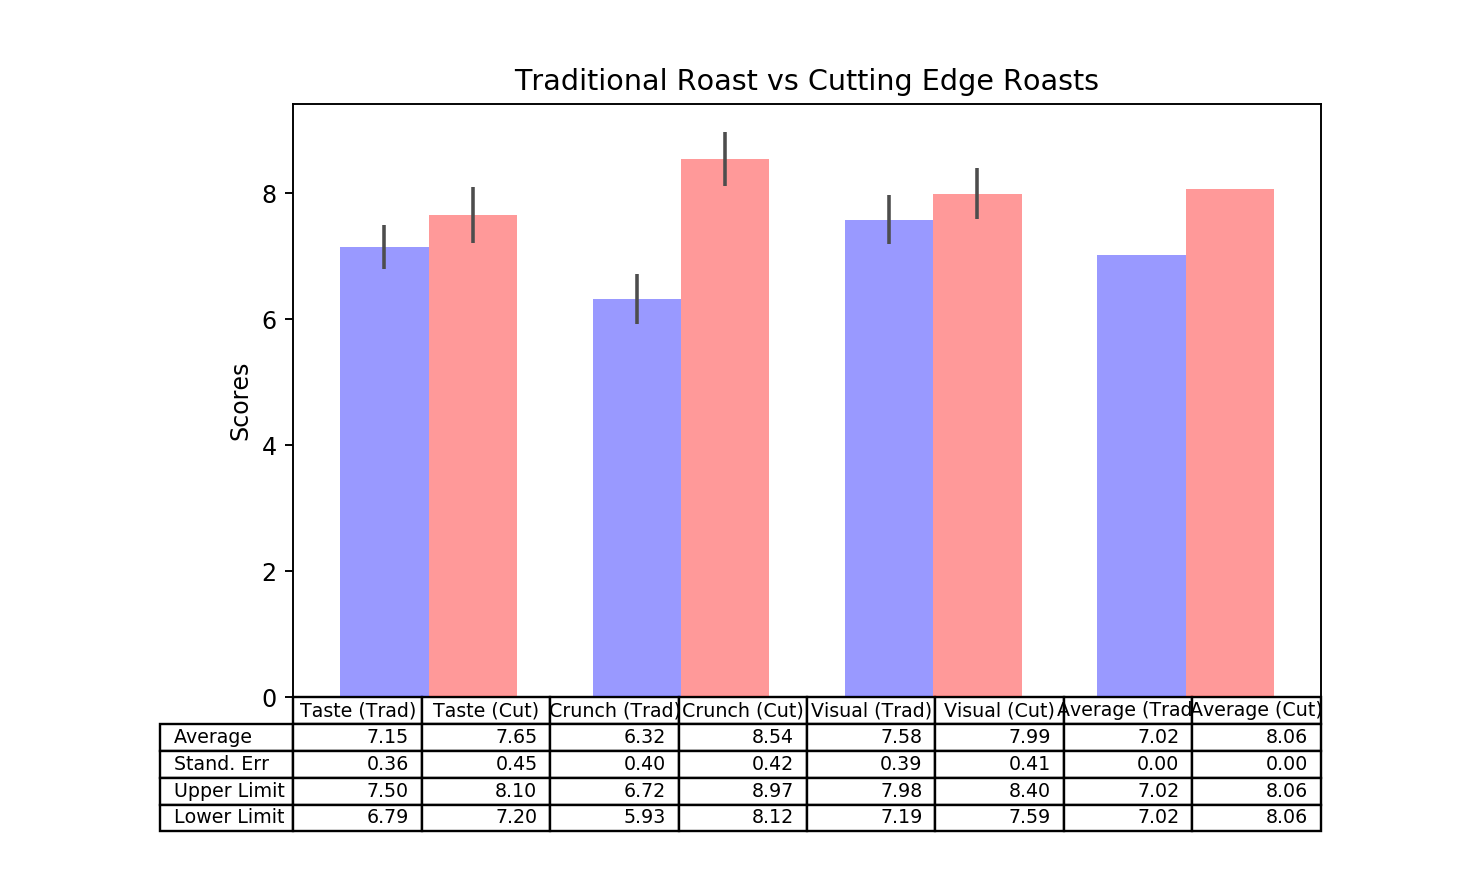

In [24]:
sterr_cl = 1.96 * np.array([np.std(taste_cl), np.std(crunch_cl), np.std(visual_cl), 0])/10
sterr_new = 1.96 * np.array([np.std(taste_new), np.std(crunch_new), np.std(visual_new), 0])/10

fig, ax = plt.subplots()
index = np.arange(4)
bar_width, opacity = 0.35, 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, averages_cl, bar_width, yerr=sterr_cl, error_kw=error_config, alpha=opacity, color='b', label='Traditional Cut')
rects1 = ax.bar(index + bar_width, averages_new, bar_width, yerr=sterr_new, error_kw=error_config, alpha=opacity, color='r', label='Edge Cut')
ax.set_ylabel('Scores')
ax.set_title('Traditional Roast vs Cutting Edge Roasts')
# Убираем подписи по оси Х и легенду, как будто таблица сама служит подписью.
#ax.set_xticks(index + bar_width / 2)
#ax.set_xticklabels(('Taste', 'Crunch', 'Visual', 'Average'))
#ax.legend(loc = 'upper center', ncol=2, bbox_to_anchor=(0.5,-0.05))
ax.set_xticks([])

# Рисуем таблицу
columns = ('Taste (Trad)', 'Taste (Cut)', 'Crunch (Trad)', 'Crunch (Cut)', 'Visual (Trad)', 'Visual (Cut)', 'Average (Trad)', 'Average (Cut)')
rows = ['Average', 'Stand. Err', 'Upper Limit', 'Lower Limit']
cell_text = [[],[],[],[]]
for i in range(4):
    cell_text[0].append('%1.2f' % (averages_cl[i]))
    cell_text[0].append('%1.2f' % (averages_new[i]))
for i in range(4):
    cell_text[1].append('%1.2f' % (sterr_cl[i]))
    cell_text[1].append('%1.2f' % (sterr_new[i]))
for i in range(4):
    cell_text[2].append('%1.2f' % (averages_cl[i] + sterr_cl[i]))
    cell_text[2].append('%1.2f' % (averages_new[i] + sterr_new[i]))
for i in range(4):
    cell_text[3].append('%1.2f' % (averages_cl[i] - sterr_cl[i]))
    cell_text[3].append('%1.2f' % (averages_new[i] - sterr_new[i]))

the_table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc='bottom')
# Просим таблицу не подбирать шрифт автоматически, устанавливаем 8-й кегль, даем больше места снизу графика.
the_table.auto_set_font_size(False)
the_table.set_fontsize(8)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.show()

Также построим построим две <a href="https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8">диаграммы размаха</a>. Для этого попросим создать два графика (одна строка, две колонки)<br>
<a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html">plt.subplots</a>(nrows=1, ncols=2, figsize=(9, 4))<br>
Отрисуем на них диаграммы размаха при помощи функции boxplot, в которую передаются массивы данных, для которых нужно строить диаграммы, расположение и метки для диаграмм. Также просим сделать диаграммы разноцветными (patch_artist=True и далее patch.set_facecolor(color)).

<IPython.core.display.Javascript object>


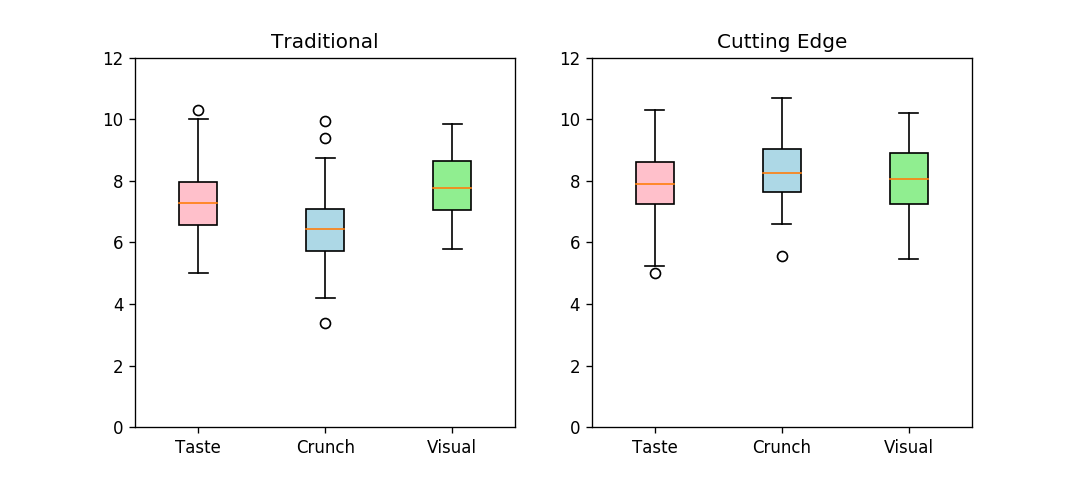

In [8]:
all_cl=np.ones((100, 3))
all_cl[:,0]=taste_cl
all_cl[:,1]=crunch_cl
all_cl[:,2]=visual_cl
all_new=np.ones((100, 3))
all_new[:,0]=taste_new
all_new[:,1]=crunch_new
all_new[:,2]=visual_new

labels = ['Taste', 'Crunch', 'Visual']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].set_ylim([0, 12])
bplot1 = axes[0].boxplot(all_cl,vert=True, patch_artist=True, labels=labels)
axes[0].set_title('Traditional')
bplot2 = axes[1].boxplot(all_new, vert=True, patch_artist=True, labels=labels)
axes[1].set_ylim([0, 12])
axes[1].set_title('Cutting Edge')
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()



Теперь отвлечемся от съедобной тематики и перейдем к классике анализа данных. Постараемся как визуализировать стандартный набор данных - <a href="https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0">ирисы Фишера</a>.<br>
Для его отображения используем библиотеку <a href="https://matplotlib.org/mpl_toolkits/mplot3d/">mplot3d</a> из Matplotlib Toolkits. Из нее нам потребуется библиотека <a href="https://matplotlib.org/mpl_toolkits/mplot3d/tutorial">Axes3D</a>, которая умеет отображать трехмерные графики. Создадим трехмерный график при помощи Axes3D, после чего отобразим на нем первые три параметра наших данных.

<IPython.core.display.Javascript object>


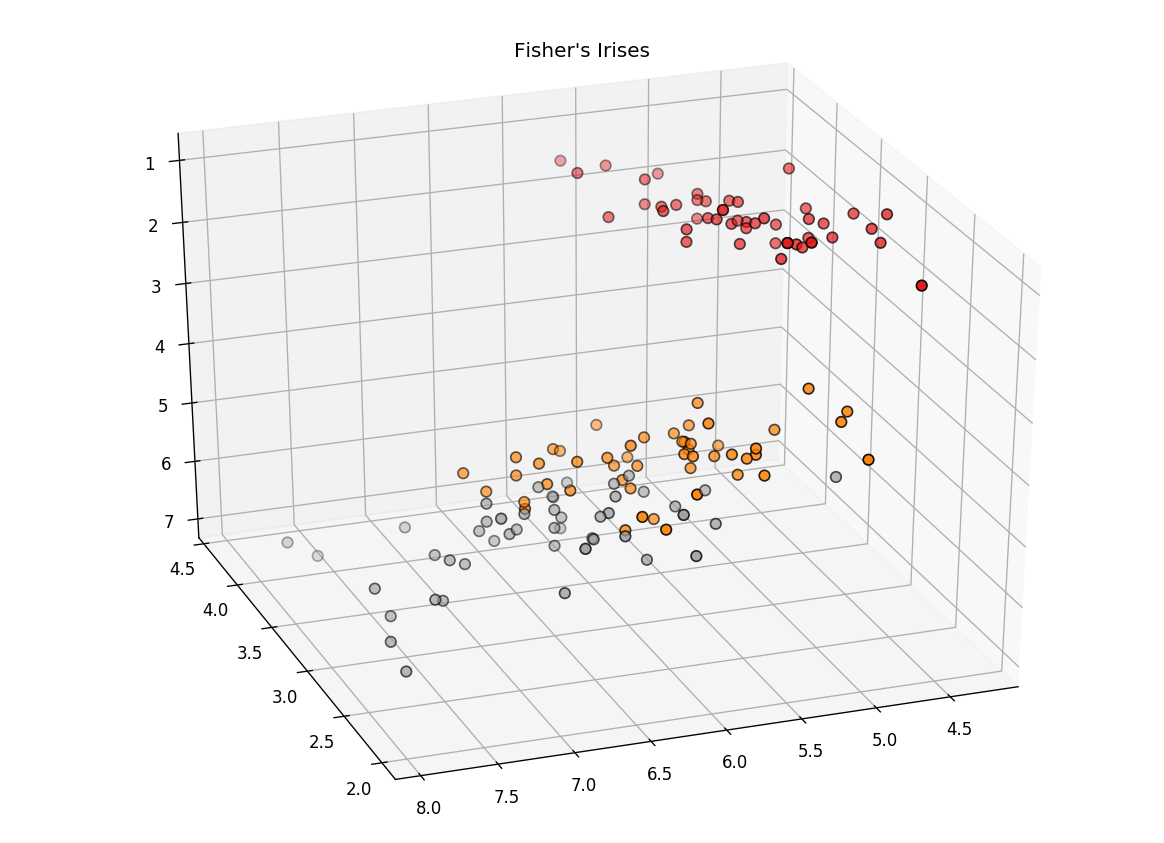

In [8]:
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

iris = load_iris()
y = iris.target
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=y,
          cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Fisher's Irises")

plt.show()

Однако количство параметров в наборе данных равно четырем. Для отображения всех измерений будем использовать эпюры. Нарисуем сетку из графиков размером 4х4. На пересечении сетки будет график, на котором отображена проекция для двух выбранных параметров.

<IPython.core.display.Javascript object>


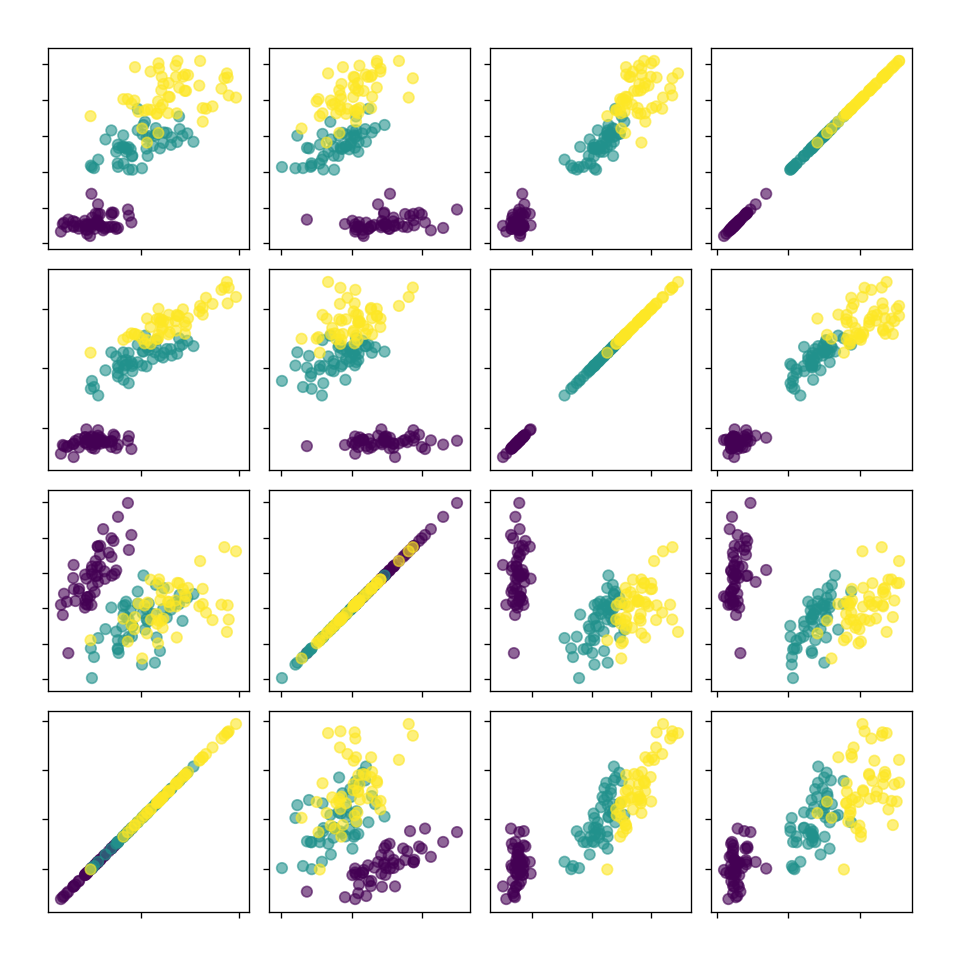

In [11]:
data = load_iris()
X = data.data
y = data.target

# dither the data for clearer plotting
X += 0.1 * np.random.random(X.shape)

fig, ax = plt.subplots(4, 4, sharex="col", sharey="row", figsize=(8, 8))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
                    hspace=0.1, wspace=0.1)

for i in range(4):
    for j in range(4):
        points = ax[3 - i, j].scatter(X[:, j], X[:, i],
                                      c=y, s=40, alpha=0.6)

# remove tick labels
for axi in ax.flat:
    for axis in [axi.xaxis, axi.yaxis]:
        axis.set_major_formatter(plt.NullFormatter())

plt.show()


Однако и такое отображение не всегда бывает удобным. Представим себе, что число параметров равно ста или миллиону. Восстановить общую картину для такого набора данных будет очень затруднительно. Вместо этого можно построить применить несколько методов.<br>
Во-первых, можно отобрать наиболее информативные параметры и отображать только их. Но это мы сейчас делать не будем.<br>
Во-вторых, можно провести преобразование пространства признаков и построить наиболее информативную проекцию. Подобным образом работает, например, метода <a href="https://habrahabr.ru/post/304214/">PCA</a>. Он выбирает наиболее информативное направление, поворачивает данные, отбрасывает выбранное направление, после чего повторяет операцию заданное количество раз.<br>
Мы можем использовать реализацию этого метода из библиотеки <a href="http://scikit-learn.org/stable/index.html">Scikit-Learn</a>.

<IPython.core.display.Javascript object>


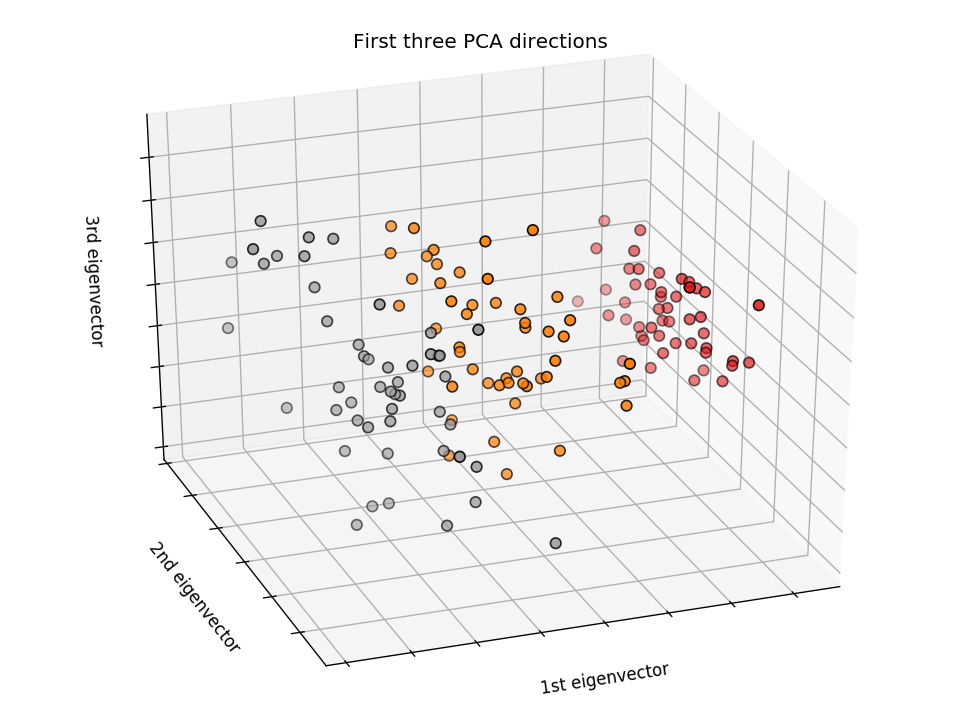

In [12]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn.decomposition import PCA

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Мы также можем попробовать построить двумерную проекцию.

<IPython.core.display.Javascript object>


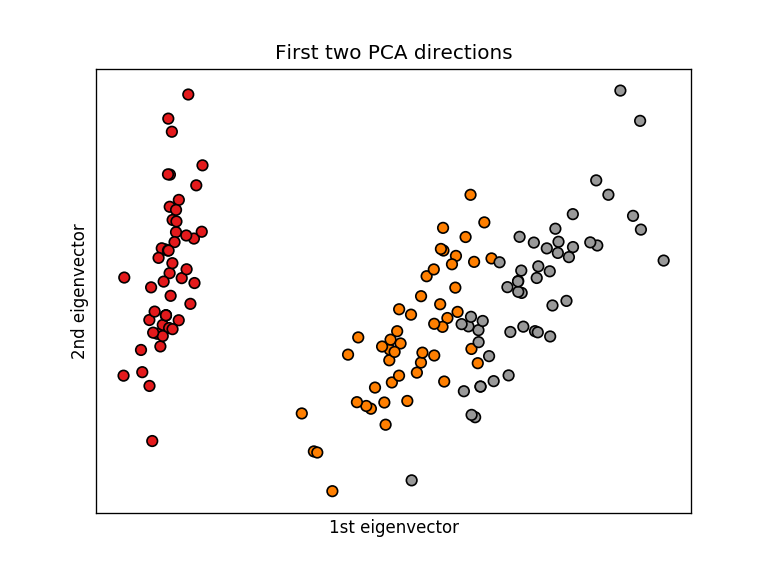

In [13]:
fig, ax = plt.subplots()
#ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=2).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_xticks([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticks([])

plt.show()

Несколько иначе <a href= "https://habrahabr.ru/post/267041/">работает</a> метод <a href="http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">t-SNE</a>. В нем объекты можно представить как некоторые узлы, находящиеся в пространстве большой размерности и соединенные между собой пружинами. Пружины могут быть двух видов: работающие на сжатие и растяжение. Далее вся конструкция в многомерносм пространстве вжимается, например, в плоскость (или объем). При воздействии узлы пытаются разлететься, но при этом не могут слишкой отойти от своих соседей, так как к ним их притягивают пружины. В итоге вся конструкция более-менее сохраняет взаимное расположение узлов даже после "размазывания" по плоскости.<br>
Снова используем sklearn.

<IPython.core.display.Javascript object>


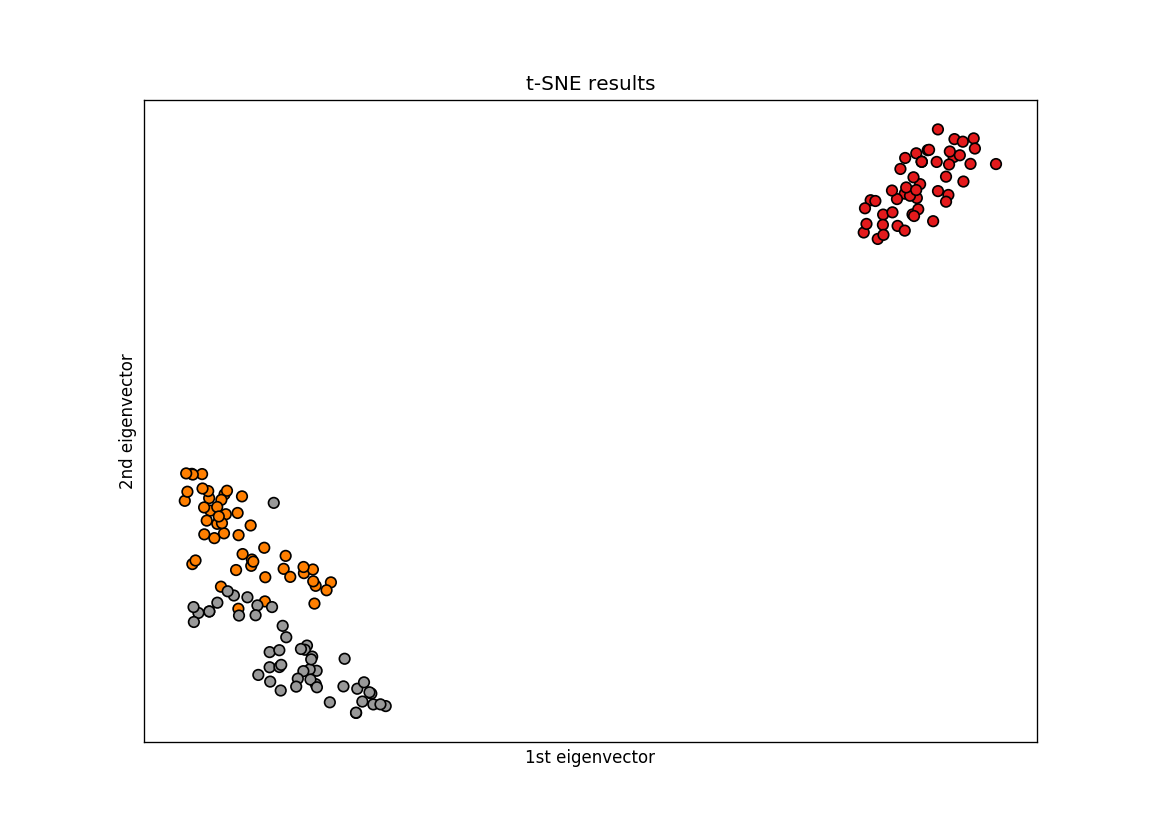

In [9]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots()
X_reduced = TSNE().fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("t-SNE results")
ax.set_xlabel("1st eigenvector")
ax.set_xticks([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticks([])

plt.show()

По умолчанию t-SNE приводит данные к двум измерениям. Однако у него много <a href="http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">скрытых параметров</a>, которые можно использовать для более тонкой настройки.

<IPython.core.display.Javascript object>


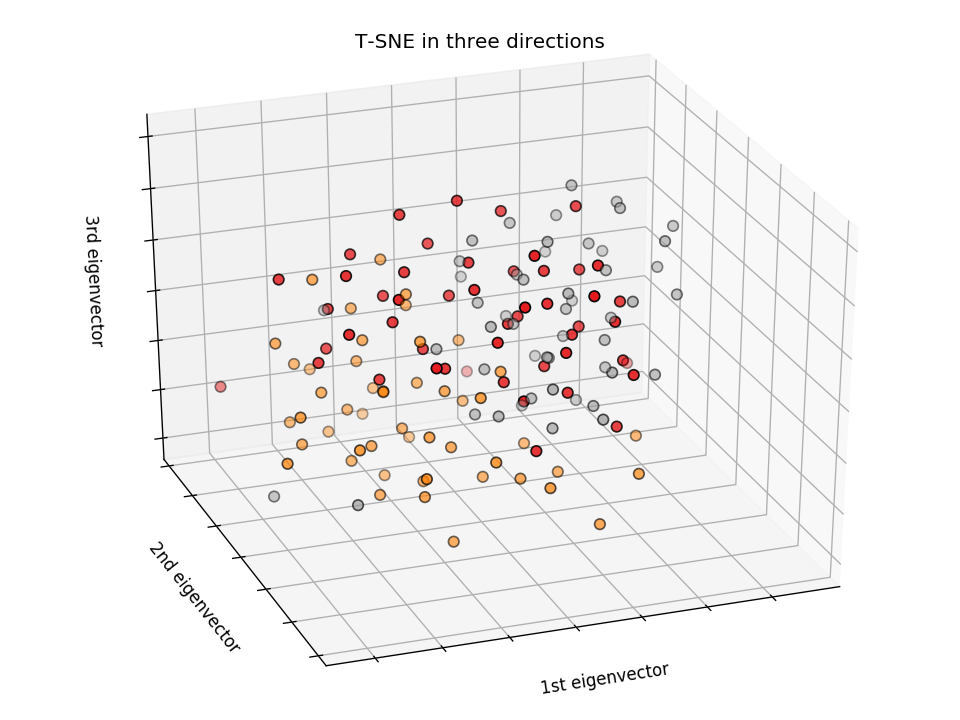

In [15]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = TSNE(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("T-SNE in three directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Как видите, получилось несколько хуже. <br>
По умолчанию T-SNE берет случайное размещение точек, поэтому на разных экспериментах будут получаться разные результаты. Ситуацию можно исправить двумя путями. Можно зафиксировать начальное разделение, а можно попросить делать начальное размещение при помощи PCA.

<IPython.core.display.Javascript object>


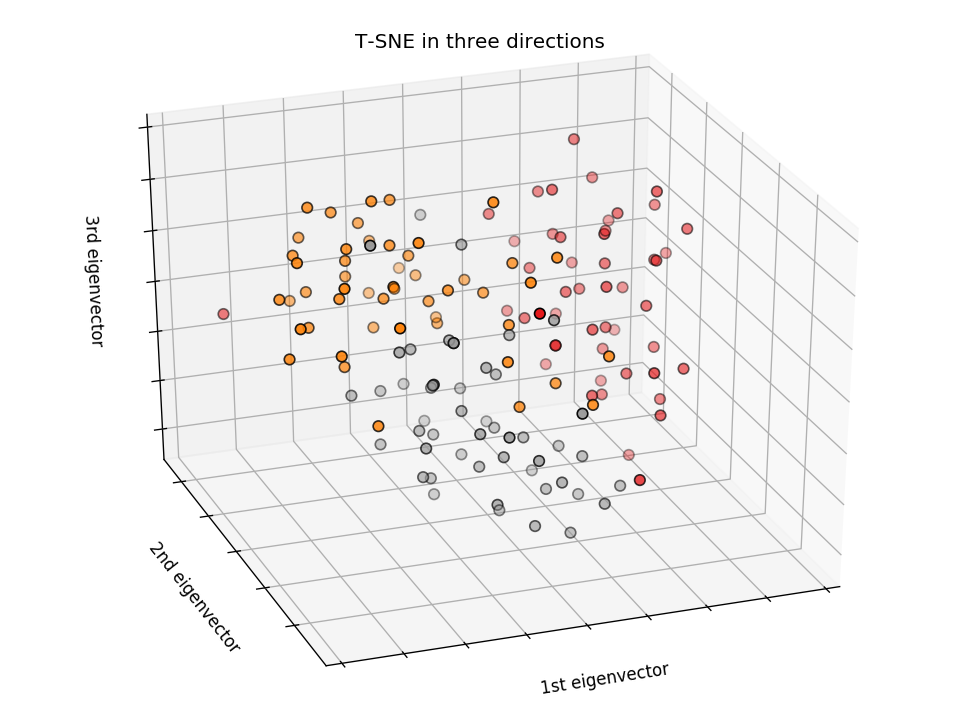

In [16]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = TSNE(n_components=3, init='pca').fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("T-SNE in three directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

T-SNEявляется очень хорошим методом преобразования неевклидового пространства к Евклидовому.<br>
Рассмотрим следующим пример. Пусть у нас имеются три статьи с N+1. Рассчитаем меру их сходства используя косинусное расстояние. <br>

In [3]:
from bs4 import BeautifulSoup
import requests
import re
import datetime
from collections import Counter
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

In [11]:
def getNPlus1Article(url):
    r = requests.get(url)
    body=re.findall('(?s)<h1>(.+?)<div class="swiper-container">', r.text)
    beau_text=BeautifulSoup(body[0], "lxml")
    words=re.findall("[а-яА-ЯёЁ]+|[а-яА-ЯёЁ]+\-[а-яА-ЯёЁ]+", beau_text.get_text())
    return dict(Counter(words))

def getLentaArticle(url):
    r = requests.get(url)
    body=re.findall('<div class="b-text clearfix js-topic__text" itemprop="articleBody">(.+?)</p></div><div class="b-banner b-banner-sponsor b-banner-sponsor_footer">', r.text)
    beau_text=BeautifulSoup(body[0], "lxml")
    words=re.findall("[а-яА-ЯёЁ]+|[а-яА-ЯёЁ]+\-[а-яА-ЯёЁ]+", beau_text.get_text())
    return dict(Counter(words))


In [40]:
a1=getNPlus1Article("https://nplus1.ru/news/2018/01/12/supermassive-black-holes")
a2=getNPlus1Article("https://nplus1.ru/news/2017/11/29/young-stars-near-black-hole")
a3=getNPlus1Article("https://nplus1.ru/news/2015/05/20/land-of-ice-and-snow")
a4=getNPlus1Article("https://nplus1.ru/news/2018/01/17/google-automl")

In [22]:
aaa=pd.DataFrame({"a":a1, "b": a2, "c": a3, "d": a4}).T
aaa=aaa.fillna(0)
print(cosine_similarity(aaa))

[[ 1.          0.56669306  0.35770748  0.50467935]
 [ 0.56669306  1.          0.46026473  0.42666954]
 [ 0.35770748  0.46026473  1.          0.39628016]
 [ 0.50467935  0.42666954  0.39628016  1.        ]]


Как видно из примера, первая статья похожа на вторую и четвертую, но вторая не похожа на четвертую.<br>
А теперь проведем преобразование пространства при попмощи t-SNE.

<IPython.core.display.Javascript object>


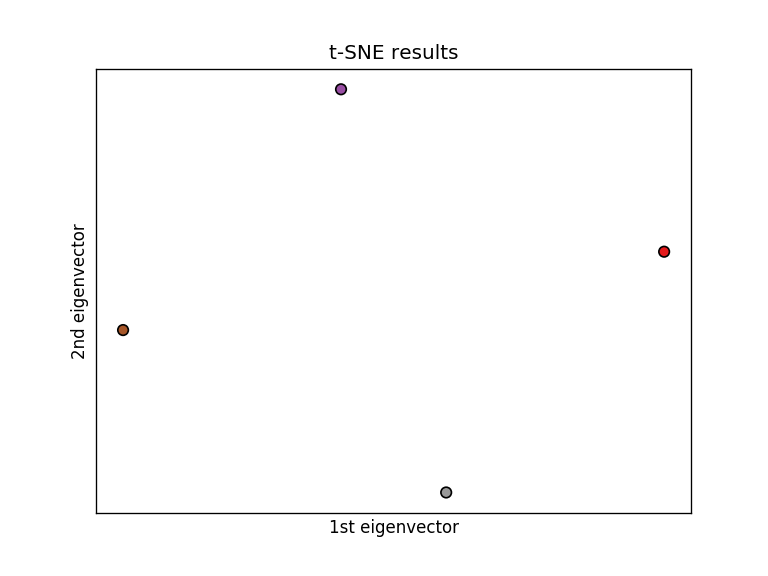

In [26]:
fig, ax = plt.subplots()
X_reduced = TSNE().fit_transform(aaa)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=range(4),
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("t-SNE results")
ax.set_xlabel("1st eigenvector")
ax.set_xticks([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticks([])

plt.show()

Попробуем отобразить статьи с Ленты.РУ за несколько дней.

In [53]:
curdate=datetime.date(2016, 1, 16)
arts=[]
for i in tqdm(range(20)):
    day = requests.get('https://lenta.ru/news/'+curdate.strftime('%Y/%m/%d'))
    body=re.findall('<h3>(.+?)</h3>', day.text)
    links=['https://lenta.ru'+re.findall('"(.+?)"', x)[0] for x in body]
    for l in links:
#        print(l)
        try:
            arts.append(getLentaArticle(l))
        except:
            pass
    curdate+=datetime.timedelta(days=1)


100%|██████████| 20/20 [12:36<00:00, 37.80s/it]


<IPython.core.display.Javascript object>


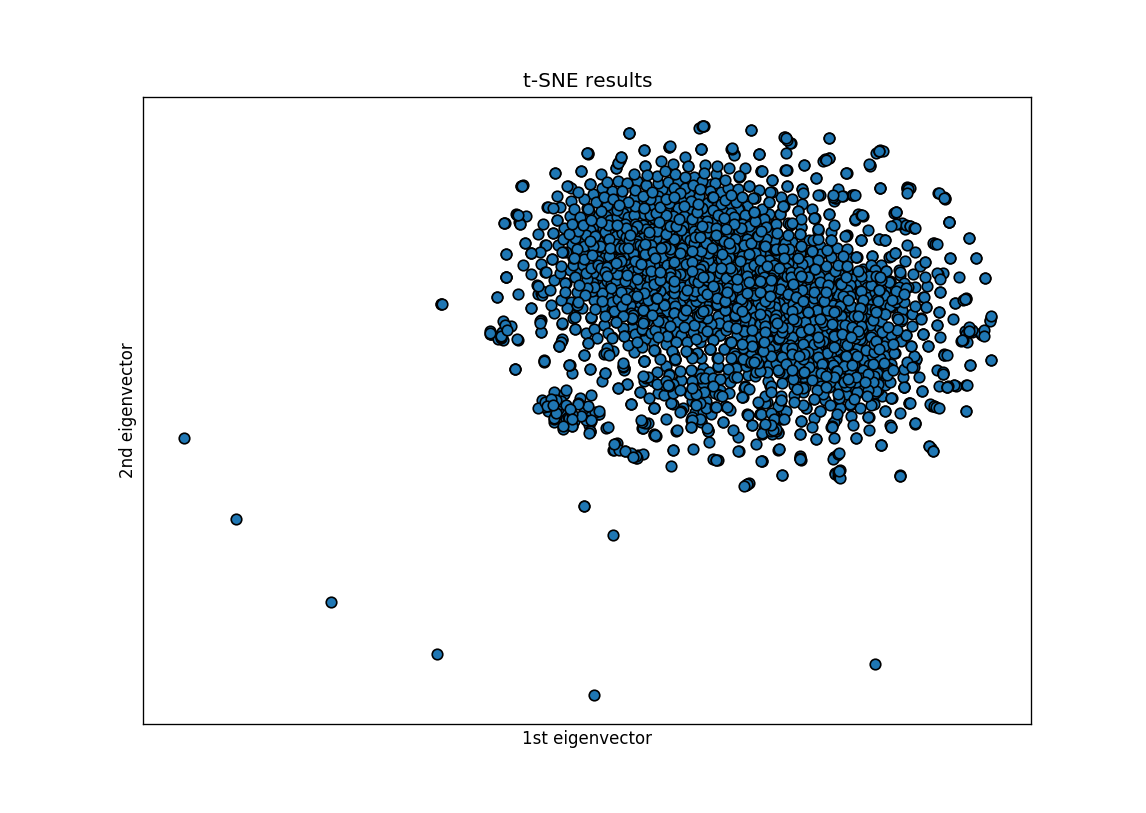

In [54]:
artData=pd.DataFrame({str(i):x for i, x in enumerate(arts)}).T.fillna(0)
X_reduced = TSNE().fit_transform(artData)
fig, ax = plt.subplots()
ax.scatter(X_reduced[:, 0], X_reduced[:, 1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("t-SNE results")
ax.set_xlabel("1st eigenvector")
ax.set_xticks([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticks([])

plt.show()

А теперь используя не <a href="https://ru.wikipedia.org/wiki/%D0%95%D0%B2%D0%BA%D0%BB%D0%B8%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B0">евклидово расстояние</a> между точками, а <a href="https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C">косинусное</a>. Также можно попробовать расстояние <a href="http://encyclopaedia.bid/%D0%B2%D0%B8%D0%BA%D0%B8%D0%BF%D0%B5%D0%B4%D0%B8%D1%8F/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2%D0%B0">Чебышёва</a>, <a href="https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2">Манхэттенское</a> и <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html">другие</a>.

<IPython.core.display.Javascript object>


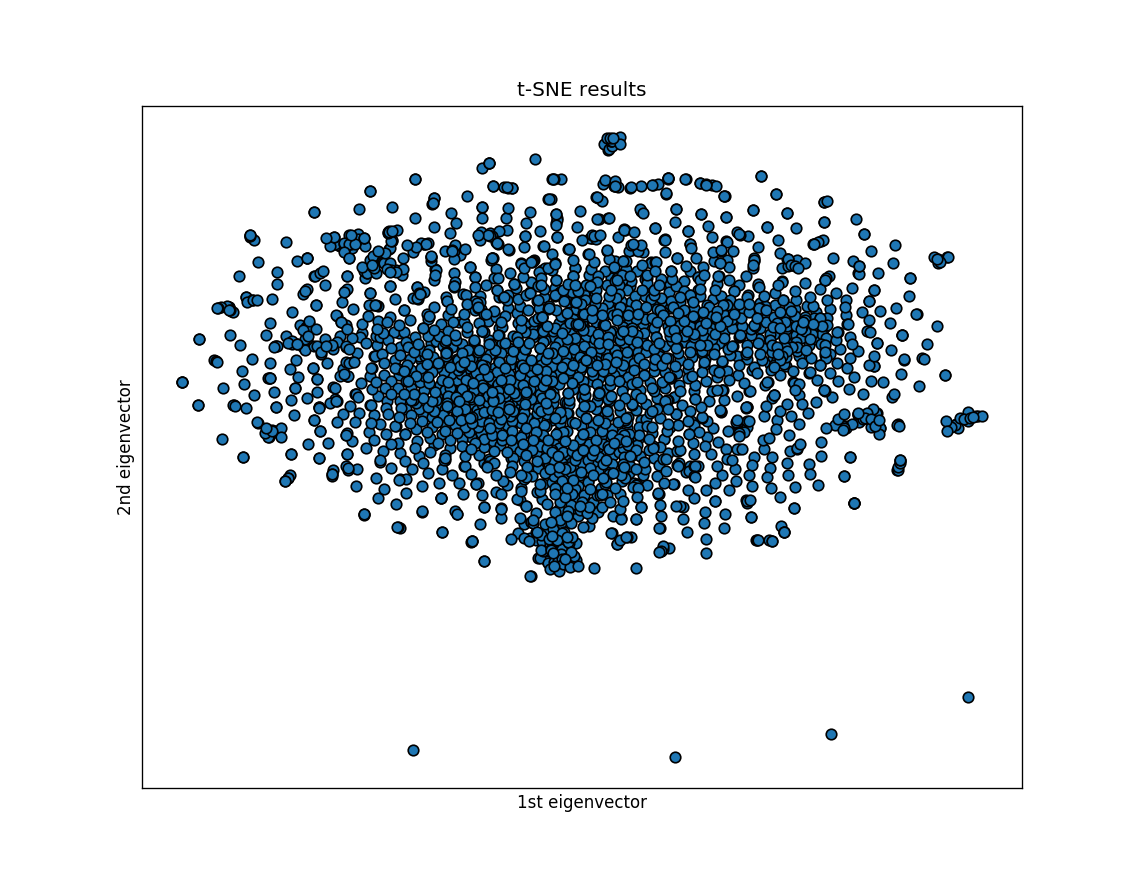

In [55]:
artData=pd.DataFrame({str(i):x for i, x in enumerate(arts)}).T.fillna(0)
artDists=abs(1-cosine_similarity(artData))

X_reduced = TSNE(metric='precomputed').fit_transform(artDists)
fig, ax = plt.subplots()
ax.scatter(X_reduced[:, 0], X_reduced[:, 1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("t-SNE results")
ax.set_xlabel("1st eigenvector")
ax.set_xticks([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticks([])

plt.show()